In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
class LeNet:
  @staticmethod
  def build(numChannels, imgRows, imgCols, numClasses,activation="relu", weightsPath=None):
		# initialize the model
    model = Sequential()
    inputShape = (imgRows, imgCols, numChannels)
		# if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (numChannels, imgRows, imgCols)
    """model.add(Conv2D(20, 5, padding="same",input_shape=inputShape))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(50, 5, padding="same"))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation(activation))"""
    model.add(Flatten())
    model.add(Dense(numClasses))
    model.add(Activation("softmax"))

    if weightsPath is not None:
      model.load_weights(weightsPath)
    return model

In [ ]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import argparse
import cv2






print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()


if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0


# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,
	numClasses=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] downloading MNIST...
[INFO] compiling model...


In [ ]:
model.fit(trainData, trainLabels, batch_size=128, epochs=50,
		verbose=1)
	# show the accuracy on the testing set
print("[INFO] evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels,
		batch_size=128, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
filters, biases = model.layers[1].get_weights()


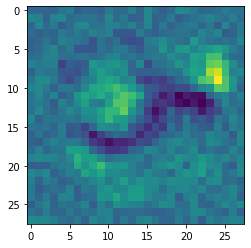

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(filters[:,5],(28,28),'C'))

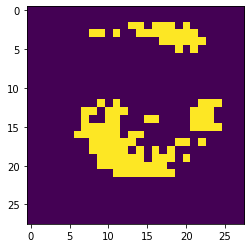

In [ ]:
kk=np.reshape(filters[:,6],(28,28),'C')
kk[kk<0.1]=0
kk[kk!=0]=1
plt.imshow(kk)

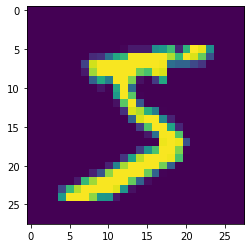

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(trainData[0,:])